<ipython-input-6-35a10c24d2db>:27: RuntimeWarning: divide by zero encountered in log
  J = (-1/m) * (np.dot(y.T, np.log(h)) + np.dot((1-y).T, np.log(1-h))) + (alpha/(2*m)) * np.sum(theta[1:]**2)


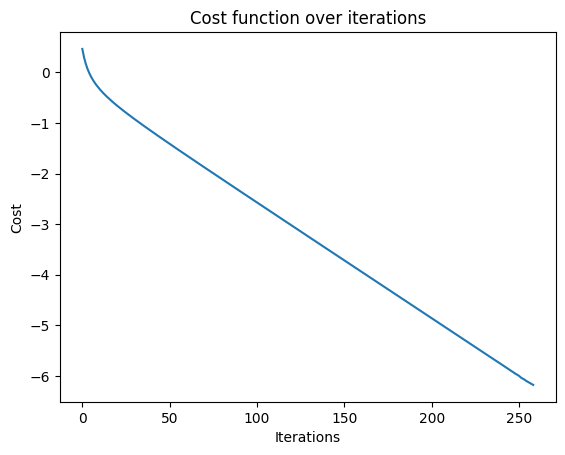

Confusion matrix:
 [[ 0 10  0]
 [ 0  9  0]
 [ 0 11  0]]
Accuracy: 0.3


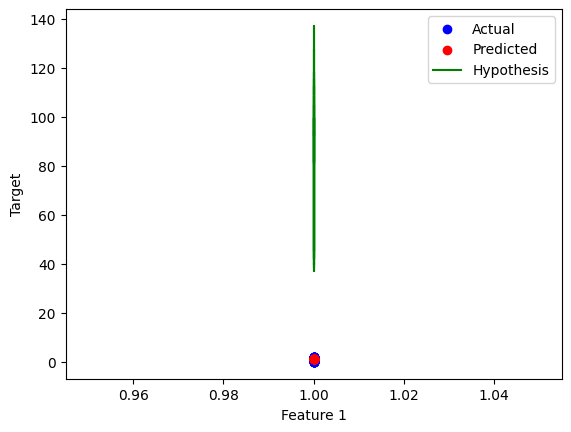

In [6]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Load the iris dataset
iris = load_iris()

# Extract the features and target
X = iris.data
y = iris.target

# Add a column of ones to X to represent the bias term
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the logistic function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the cost function with regularization
def cost_function(theta, X, y, alpha):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    J = (-1/m) * (np.dot(y.T, np.log(h)) + np.dot((1-y).T, np.log(1-h))) + (alpha/(2*m)) * np.sum(theta[1:]**2)
    return J

# Define the gradient function with regularization
def gradient(theta, X, y, alpha):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    grad = (1/m) * np.dot(X.T, (h-y))
    grad[1:] = grad[1:] + (alpha/m) * theta[1:]
    return grad

# Define the function to perform gradient descent
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    J_history = np.zeros((iterations, 1))
    for i in range(iterations):
        theta = theta - alpha * gradient(theta, X, y, alpha)
        J_history[i] = cost_function(theta, X, y, alpha)
    return theta, J_history

# Initialize theta and perform gradient descent
theta = np.zeros((X_train.shape[1], 1))
alpha = 0.01
iterations = 1000
theta, J_history = gradient_descent(X_train, y_train.reshape(-1, 1), theta, alpha, iterations)

# Plot the cost function over iterations
import matplotlib.pyplot as plt
plt.plot(J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function over iterations')
plt.show()

# Make predictions on the test set
y_pred = np.round(sigmoid(np.dot(X_test, theta))).astype(int)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

# Calculate the accuracy
accuracy = np.sum(np.diag(cm)) / np.sum(cm)
print('Accuracy:', accuracy)

plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 0], y_pred, color='red', label='Predicted')
h = X_test.dot(theta)
plt.plot(X_test[:, 0], h, color='green', label='Hypothesis')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.legend()
plt.show()